# AnalisisEquinor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%%time
PD = pd.read_excel("Volve production data.xlsx", sheet_name="Daily Production Data")
PM = pd.read_excel("Volve production data.xlsx", sheet_name="Monthly Production Data")

Wall time: 55.8 s


In [3]:
print("Dimensiones Produccion Diaria :", PD.shape)
print("Dimensiones Produccion Mensual :",PM.shape)

Dimensiones Produccion Diaria : (15634, 24)
Dimensiones Produccion Mensual : (527, 10)


## Analisis preliminar
- Produccion Diaria

`NPD` -> Norweign Petroleum Directorate

In [4]:
PD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

- Produccion Mensual

In [5]:
PM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wellbore name  526 non-null    object 
 1   NPDCode        526 non-null    float64
 2   Year           526 non-null    float64
 3   Month          526 non-null    float64
 4   On Stream      516 non-null    object 
 5   Oil            312 non-null    object 
 6   Gas            312 non-null    object 
 7   Water          312 non-null    object 
 8   GI             1 non-null      object 
 9   WI             202 non-null    object 
dtypes: float64(3), object(7)
memory usage: 41.3+ KB


## Analisis PD
`PD["ON_STREAM_HRS"],PD["AVG_CHOKE_UOM"]`-> Buscar documentacion


In [6]:
print("Pozos: \n",PD["WELL_BORE_CODE"].unique())
print(len(PD["WELL_BORE_CODE"].unique()))
print("Pozos: \n",PD["NPD_WELL_BORE_NAME"].unique())
print("\nCampo: \n",PD["NPD_FIELD_CODE"].unique())
print("Campo: \n",PD["NPD_FIELD_NAME"].unique())
print("\nInstalacion: \n",PD["NPD_FACILITY_CODE"].unique())
print("Instalacion: \n",PD["NPD_FACILITY_NAME"].unique())
print("\nHoras",len(PD["ON_STREAM_HRS"]))
print("\nTipo  : ",PD["FLOW_KIND"].unique())
print("\nTipo  : ",PD["WELL_TYPE"].unique())

Pozos: 
 ['NO 15/9-F-1 C' 'NO 15/9-F-11 H' 'NO 15/9-F-12 H' 'NO 15/9-F-14 H'
 'NO 15/9-F-15 D' 'NO 15/9-F-4 AH' 'NO 15/9-F-5 AH']
7
Pozos: 
 ['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5']

Campo: 
 [3420717]
Campo: 
 ['VOLVE']

Instalacion: 
 [369304]
Instalacion: 
 ['MÆRSK INSPIRER']

Horas 15634

Tipo  :  ['production' 'injection']

Tipo  :  ['WI' 'OP']


In [7]:
PD.head(20)

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0  2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1  2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2  2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3  2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4  2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   
5  2014-04-12  NO 15/9-F-1 C                7405         15/9-F-1 C   
6  2014-04-13  NO 15/9-F-1 C                7405         15/9-F-1 C   
7  2014-04-14  NO 15/9-F-1 C                7405         15/9-F-1 C   
8  2014-04-15  NO 15/9-F-1 C                7405         15/9-F-1 C   
9  2014-04-16  NO 15/9-F-1 C                7405         15/9-F-1 C   
10 2014-04-17  NO 15/9-F-1 C                7405         15/9-F-1 C   
11 2014-04-18  NO 15/9-F-1 C                7405         15/9-F-1 C   
12 2014-04-19  NO 15/9-F-1 C                7405         15/9-F-1 C   
13 2014-04-20  NO 15/9-F-1 C                7405         15/9-F-1 C   
14 2014-04-21  NO 15/9-F-1 C                7405         15/9-F-1 C   
15 2014-04-22  NO 15/9-F-1 C                7405         15/9-F-1 C   
16 2014-04-23  NO 15/9-F-1 C                7405         15/9-F-1 C   
17 2014-04-24  NO 15/9-F-1 C                7405         15/9-F-1 C   
18 2014-04-25  NO 15/9-F-1 C                7405         15/9-F-1 C   
19 2014-04-26  NO 15/9-F-1 C                7405         15/9-F-1 C   

    NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0          3420717          VOLVE             369304    MÆRSK INSPIRER   
1          3420717          VOLVE             369304    MÆRSK INSPIRER   
2          3420717          VOLVE             369304    MÆRSK INSPIRER   
3          3420717          VOLVE             369304    MÆRSK INSPIRER   
4          3420717          VOLVE             369304    MÆRSK INSPIRER   
5          3420717          VOLVE             369304    MÆRSK INSPIRER   
6          3420717          VOLVE             369304    MÆRSK INSPIRER   
7          3420717          VOLVE             369304    MÆRSK INSPIRER   
8          3420717          VOLVE             369304    MÆRSK INSPIRER   
9          3420717          VOLVE             369304    MÆRSK INSPIRER   
10         3420717          VOLVE             369304    MÆRSK INSPIRER   
11         3420717          VOLVE             369304    MÆRSK INSPIRER   
12         3420717          VOLVE             369304    MÆRSK INSPIRER   
13         3420717          VOLVE             369304    MÆRSK INSPIRER   
14         3420717          VOLVE             369304    MÆRSK INSPIRER   
15         3420717          VOLVE             369304    MÆRSK INSPIRER   
16         3420717          VOLVE             369304    MÆRSK INSPIRER   
17         3420717          VOLVE             369304    MÆRSK INSPIRER   
18         3420717          VOLVE             369304    MÆRSK INSPIRER   
19         3420717          VOLVE             369304    MÆRSK INSPIRER   

    ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM   AVG_WHP_P  \
0             0.0               0.000000  ...              %    0.000000   
1             0.0                    NaN  ...              %    0.000000   
2             0.0                    NaN  ...              %    0.000000   
3             0.0                    NaN  ...              %    0.000000   
4             0.0             310.376140  ...              %   33.097880   
5             0.0             303.500780  ...              %   22.053340   
6             0.0             303.534810  ...              %   27.502810   
7             0.0             303.782280  ...              %   20.995520   
8             0.0             303.858210  ...              %   13.917540   
9             0.0             303.791870  ...              %    4.119940   
10            0.0             304.335180  ...              %   21.434180   
11            0.0             304.848590  ...  

Wall time: 4min 42s


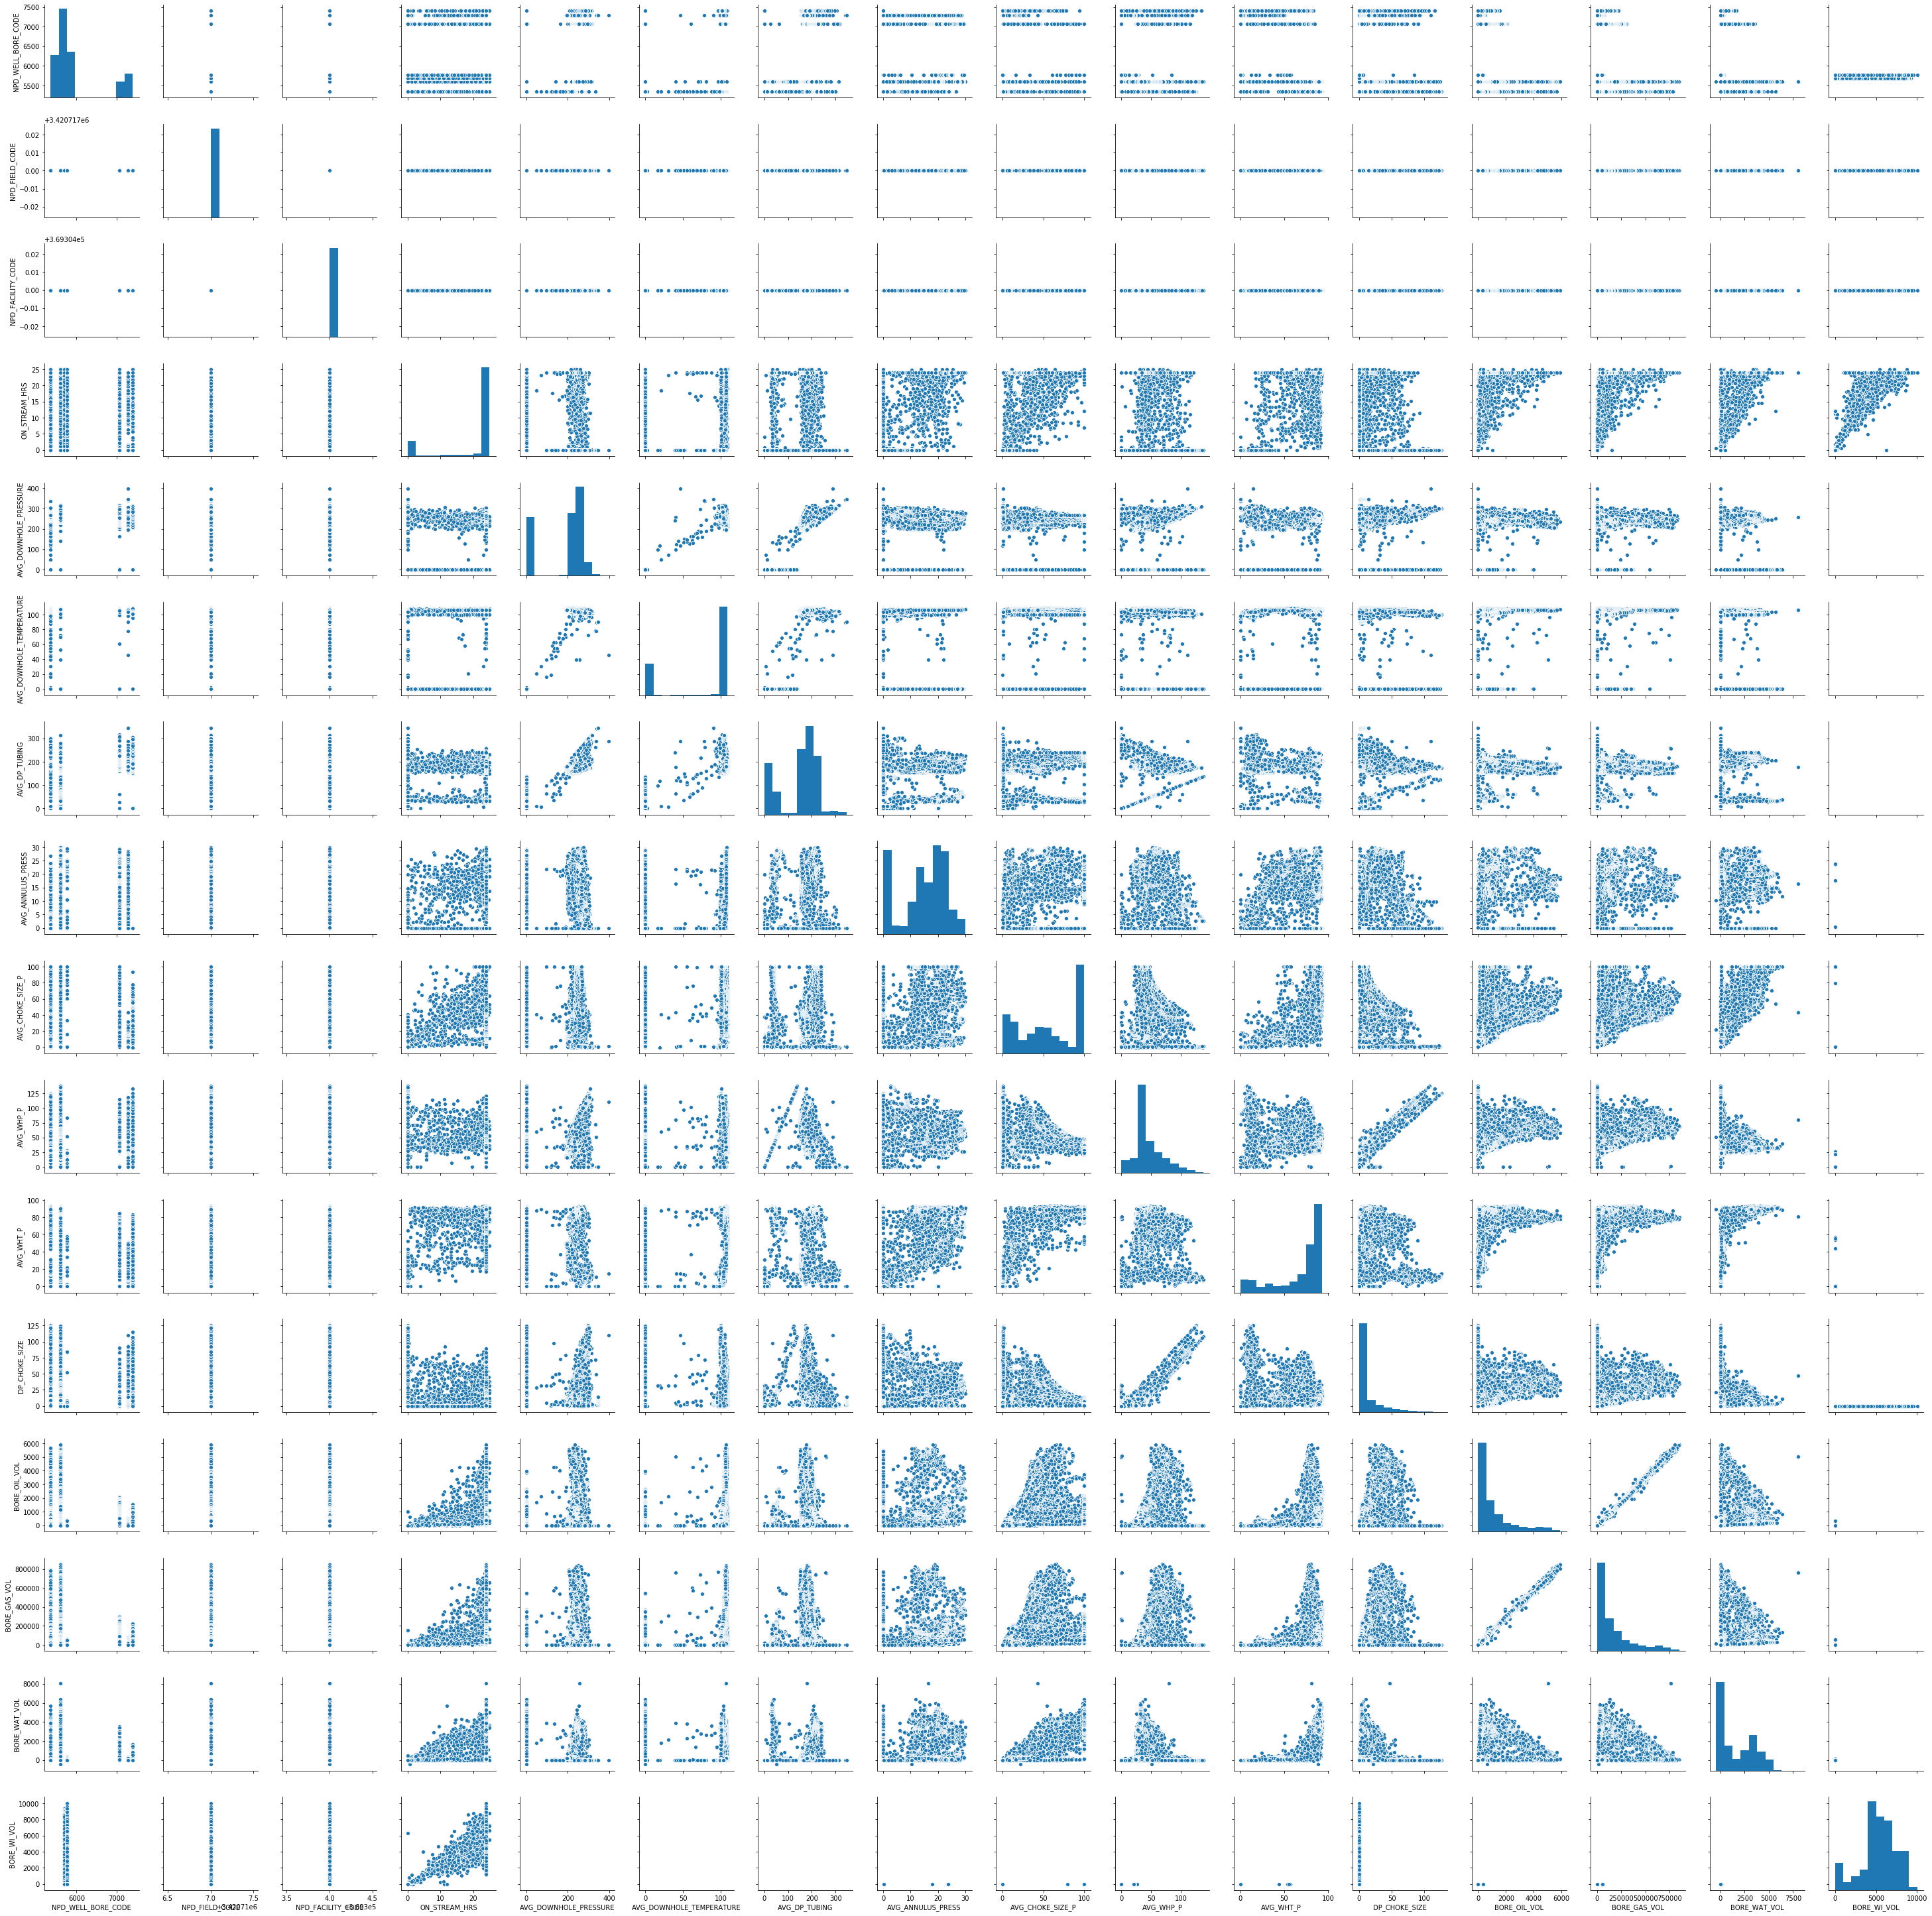

In [8]:
%%time 
sns.pairplot(PD)

In [9]:
PD1 = pd.DataFrame()
PD1["AVG_WHP_P"] = PD["AVG_WHP_P"].dropna()
PD1["DP_CHOKE_SIZE"] = PD["DP_CHOKE_SIZE"].dropna()
PD1["AVG_CHOKE_SIZE_P"] = PD["AVG_CHOKE_SIZE_P"].dropna()
PD1["AVG_DP_TUBING"] = PD["AVG_DP_TUBING"].dropna()
PD1["AVG_ANNULUS_PRESS"] = PD["AVG_ANNULUS_PRESS"].dropna()

In [10]:
PD.describe()

NPD_WELL_BORE_CODE  NPD_FIELD_CODE  NPD_FACILITY_CODE  ON_STREAM_HRS  \
count        15634.000000         15634.0            15634.0   15349.000000   
mean          5908.581745       3420717.0           369304.0      19.994093   
std            649.231622             0.0                0.0       8.369978   
min           5351.000000       3420717.0           369304.0       0.000000   
25%           5599.000000       3420717.0           369304.0      24.000000   
50%           5693.000000       3420717.0           369304.0      24.000000   
75%           5769.000000       3420717.0           369304.0      24.000000   
max           7405.000000       3420717.0           369304.0      25.000000   

       AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
count            8980.000000               8980.000000    8980.000000   
mean              181.803869                 77.162969     154.028787   
std               109.712363                 45.657948      76.752373   
min                 0.000000                  0.000000       0.000000   
25%                 0.000000                  0.000000      83.665361   
50%               232.896939                103.186689     175.588861   
75%               255.401455                106.276591     204.319964   
max               397.588550                108.502178     345.906770   

       AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  \
count        7890.000000       8919.000000  9155.000000  9146.000000   
mean           14.856100         55.168533    45.377811    67.728440   
std             8.406822         36.692924    24.752631    27.719028   
min             0.000000          0.000000     0.000000     0.000000   
25%            10.841437         18.952989    31.148062    56.577834   
50%            16.308598         52.096877    37.933620    80.071250   
75%            21.306125         99.924288    57.101268    88.062202   
max            30.019828        100.000000   137.311030    93.509584   

       DP_CHOKE_SIZE  BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL   BORE_WI_VOL  
count   15340.000000   9161.000000    9161.000000   9161.000000   5706.000000  
mean       11.441060   1095.631548  161049.059703   1672.151332   5315.480815  
std        19.816928   1323.538151  188136.410434   1706.982853   2181.486695  
min         0.000000      0.000000       0.000000   -457.840000      0.000000  
25%         0.000000    190.690000   29430.590000     19.870000   4338.204674  
50%         2.384969    557.550000   87749.660000   1097.790000   5504.739769  
75%        13.765020   1345.200000  202482.300000   3260.950000   6781.058040  
max       125.718570   5901.840000  851131.520000   8019.740000  10013.600000

## Analisis PM



In [11]:
PM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wellbore name  526 non-null    object 
 1   NPDCode        526 non-null    float64
 2   Year           526 non-null    float64
 3   Month          526 non-null    float64
 4   On Stream      516 non-null    object 
 5   Oil            312 non-null    object 
 6   Gas            312 non-null    object 
 7   Water          312 non-null    object 
 8   GI             1 non-null      object 
 9   WI             202 non-null    object 
dtypes: float64(3), object(7)
memory usage: 41.3+ KB


In [12]:
print("Pozos: \n",PM["Wellbore name"].unique())
len(PM["Wellbore name"].unique())
print("Codigo: \n",PM["NPDCode"].unique())

Pozos: 
 [nan '15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D'
 '15/9-F-4' '15/9-F-5']
Codigo: 
 [  nan 7405. 7078. 5599. 5351. 7289. 5693. 5769.]


In [13]:
PM = pd.read_excel("Volve production data.xlsx", sheet_name="Monthly Production Data")

In [14]:
PM = PM.drop([0])

In [15]:
PM["Oil"] = PM["Oil"].astype(float)
PM["Gas"] = PM["Gas"].astype(float)
PM["Water"] = PM["Water"].astype(float)

In [17]:
PM.head(10)

Wellbore name  NPDCode    Year  Month On Stream       Oil         Gas  \
1     15/9-F-1 C   7405.0  2014.0    4.0     227.5  11142.47  1597936.65   
2     15/9-F-1 C   7405.0  2014.0    5.0   733.833  24901.95  3496229.65   
3     15/9-F-1 C   7405.0  2014.0    6.0   705.917  19617.76  2886661.69   
4     15/9-F-1 C   7405.0  2014.0    7.0   742.417  15085.68  2249365.75   
5     15/9-F-1 C   7405.0  2014.0    8.0   432.992   6970.43  1048190.80   
6     15/9-F-1 C   7405.0  2014.0    9.0     630.3   9168.43  1414099.99   
7     15/9-F-1 C   7405.0  2014.0   10.0       745   9468.06  1462063.99   
8     15/9-F-1 C   7405.0  2014.0   11.0   579.775   6710.33  1044188.30   
9     15/9-F-1 C   7405.0  2014.0   12.0      27.5    120.29    25857.08   
10    15/9-F-1 C   7405.0  2015.0    1.0   479.917  10875.53  1604934.60   

       Water   GI   WI  
1       0.00  NaN  NaN  
2     783.48  NaN  NaN  
3    2068.48  NaN  NaN  
4    6243.98  NaN  NaN  
5    4529.75  NaN  NaN  
6    8317.59  NaN  NaN  
7   10364.87  NaN  NaN  
8    7234.24  NaN  NaN  
9     183.44  NaN  NaN  
10   6850.80  NaN  NaN

In [18]:
PM.tail(10)

Wellbore name  NPDCode    Year  Month On Stream      Oil         Gas  \
517      15/9-F-5   5769.0  2015.0   12.0    739.25      NaN         NaN   
518      15/9-F-5   5769.0  2016.0    1.0   721.417      NaN         NaN   
519      15/9-F-5   5769.0  2016.0    2.0    691.25      NaN         NaN   
520      15/9-F-5   5769.0  2016.0    3.0       743      NaN         NaN   
521      15/9-F-5   5769.0  2016.0    4.0   345.417  3400.61   538638.56   
522      15/9-F-5   5769.0  2016.0    5.0       732  9724.40  1534677.16   
523      15/9-F-5   5769.0  2016.0    6.0   718.417  9121.48  1468557.12   
524      15/9-F-5   5769.0  2016.0    7.0   668.642  9985.29  1602674.39   
525      15/9-F-5   5769.0  2016.0    8.0   608.425  8928.90  1417278.51   
526      15/9-F-5   5769.0  2016.0    9.0         0     0.00        0.00   

       Water   GI      WI  
517      NaN  NaN  145383  
518      NaN  NaN  148395  
519      NaN  NaN  164189  
520      NaN  NaN  139811  
521  2380.78  NaN   20227  
522  3949.90  NaN       0  
523  2376.93  NaN     NaN  
524  2453.71  NaN       0  
525  2371.86  NaN       0  
526     0.00  NaN       0

In [19]:
PM["On Stream"] = PM["On Stream"].astype(float)
PM.describe()

NPDCode         Year       Month   On Stream            Oil  \
count   526.000000   526.000000  526.000000  515.000000     311.000000   
mean   5906.731939  2012.380228    6.482890  595.901633   32273.571093   
std     650.021100     2.633829    3.417977  196.676640   37361.937092   
min    5351.000000  2007.000000    1.000000    0.000000       0.000000   
25%    5599.000000  2010.000000    4.000000  561.334160    6085.665000   
50%    5693.000000  2013.000000    6.500000  683.741660   17870.720000   
75%    5769.000000  2015.000000    9.000000  720.000000   37607.385000   
max    7405.000000  2016.000000   12.000000  745.000000  166439.670000   

                Gas          Water  
count  3.110000e+02     311.000000  
mean   4.743956e+06   49255.878939  
std    5.302562e+06   47458.158698  
min    0.000000e+00       0.000000  
25%    9.236522e+05    3534.335000  
50%    2.722573e+06   36195.930000  
75%    5.780980e+06   94056.455000  
max    2.410636e+07  155365.680000

In [20]:
PM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 1 to 526
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wellbore name  526 non-null    object 
 1   NPDCode        526 non-null    float64
 2   Year           526 non-null    float64
 3   Month          526 non-null    float64
 4   On Stream      515 non-null    float64
 5   Oil            311 non-null    float64
 6   Gas            311 non-null    float64
 7   Water          311 non-null    float64
 8   GI             0 non-null      object 
 9   WI             201 non-null    object 
dtypes: float64(7), object(3)
memory usage: 65.2+ KB


## Graficacion 
- PD

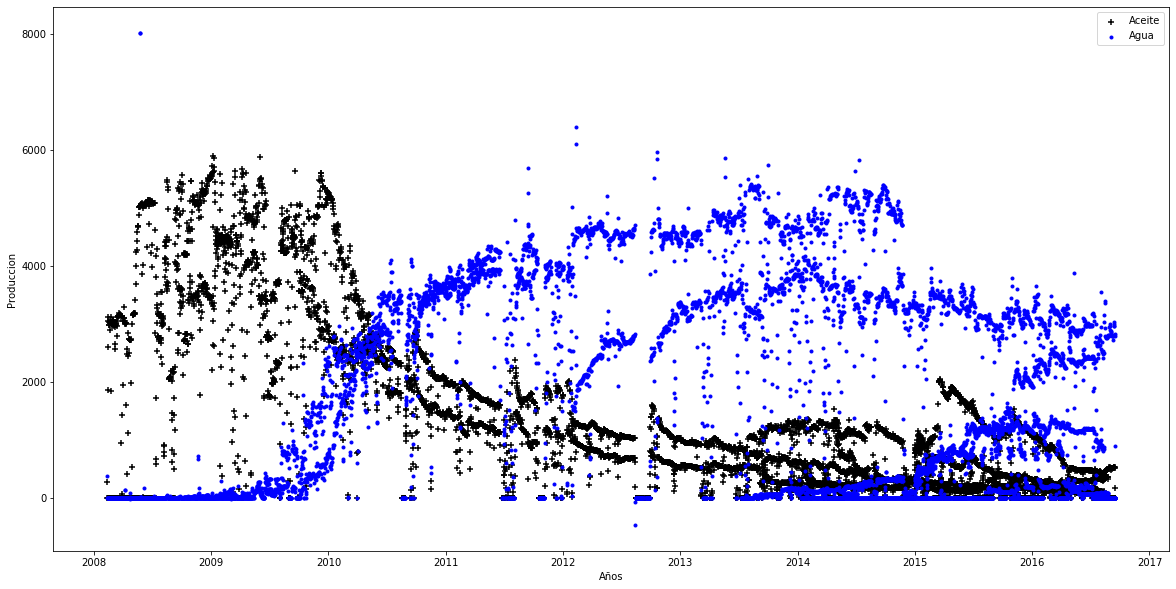

In [21]:
fig = plt.figure(figsize=(20,10))
plt.scatter(PD["DATEPRD"],PD["BORE_OIL_VOL"],label="Aceite",color = "black",marker ="+")
plt.scatter(PD["DATEPRD"],PD["BORE_WAT_VOL"],label="Agua",color  = "Blue", marker =".")
plt.xlabel("Años")
plt.ylabel("Produccion")
plt.legend()
plt.show()

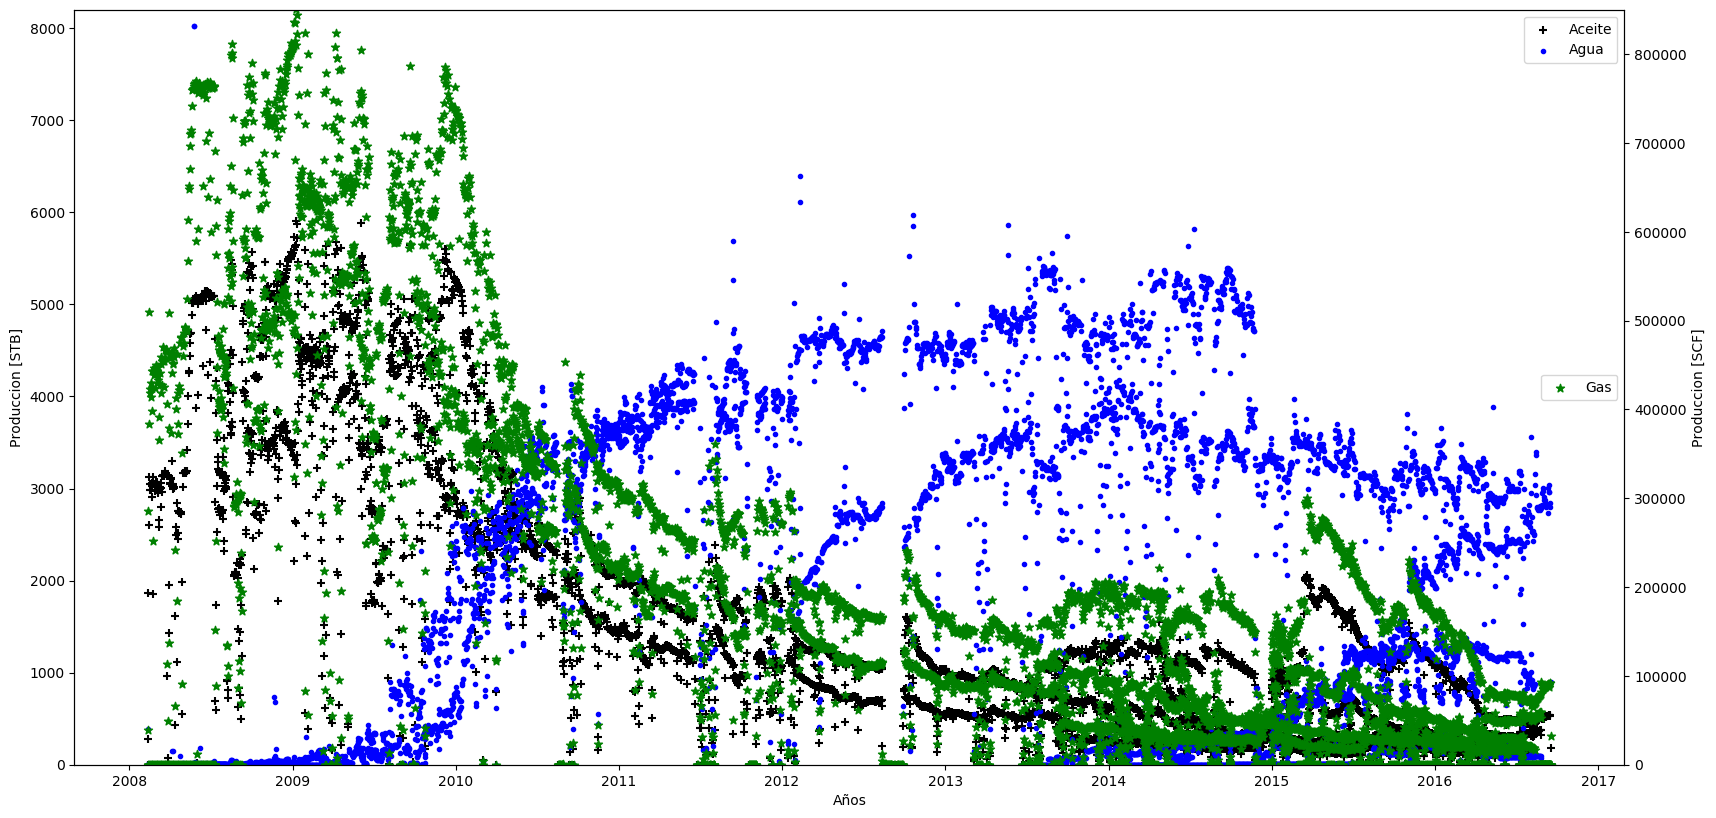

In [22]:
fig, ax1 = plt.subplots(figsize=(20,10),dpi=100)

ax2 = ax1.twinx()
ax1.scatter(PD["DATEPRD"],PD["BORE_OIL_VOL"],label="Aceite",color = "black",marker ="+")
ax1.scatter(PD["DATEPRD"],PD["BORE_WAT_VOL"],label="Agua",color  = "Blue", marker =".")
ax2.scatter(PD["DATEPRD"],PD["BORE_GAS_VOL"],label = "Gas",color="green",marker = "*")
ax1.set_xlabel('Años')
ax1.set_ylabel('Produccion [STB]')
ax2.set_ylabel('Produccion [SCF]')
ax1.set_ylim(0,8200)
ax2.set_ylim(0,850000)
ax1.legend(loc = "upper right")
ax2.legend(loc = "center right")
plt.show()

- PM

In [23]:
MC = np.arange(len(PM))
PM["Mes Consecutivo"] = MC

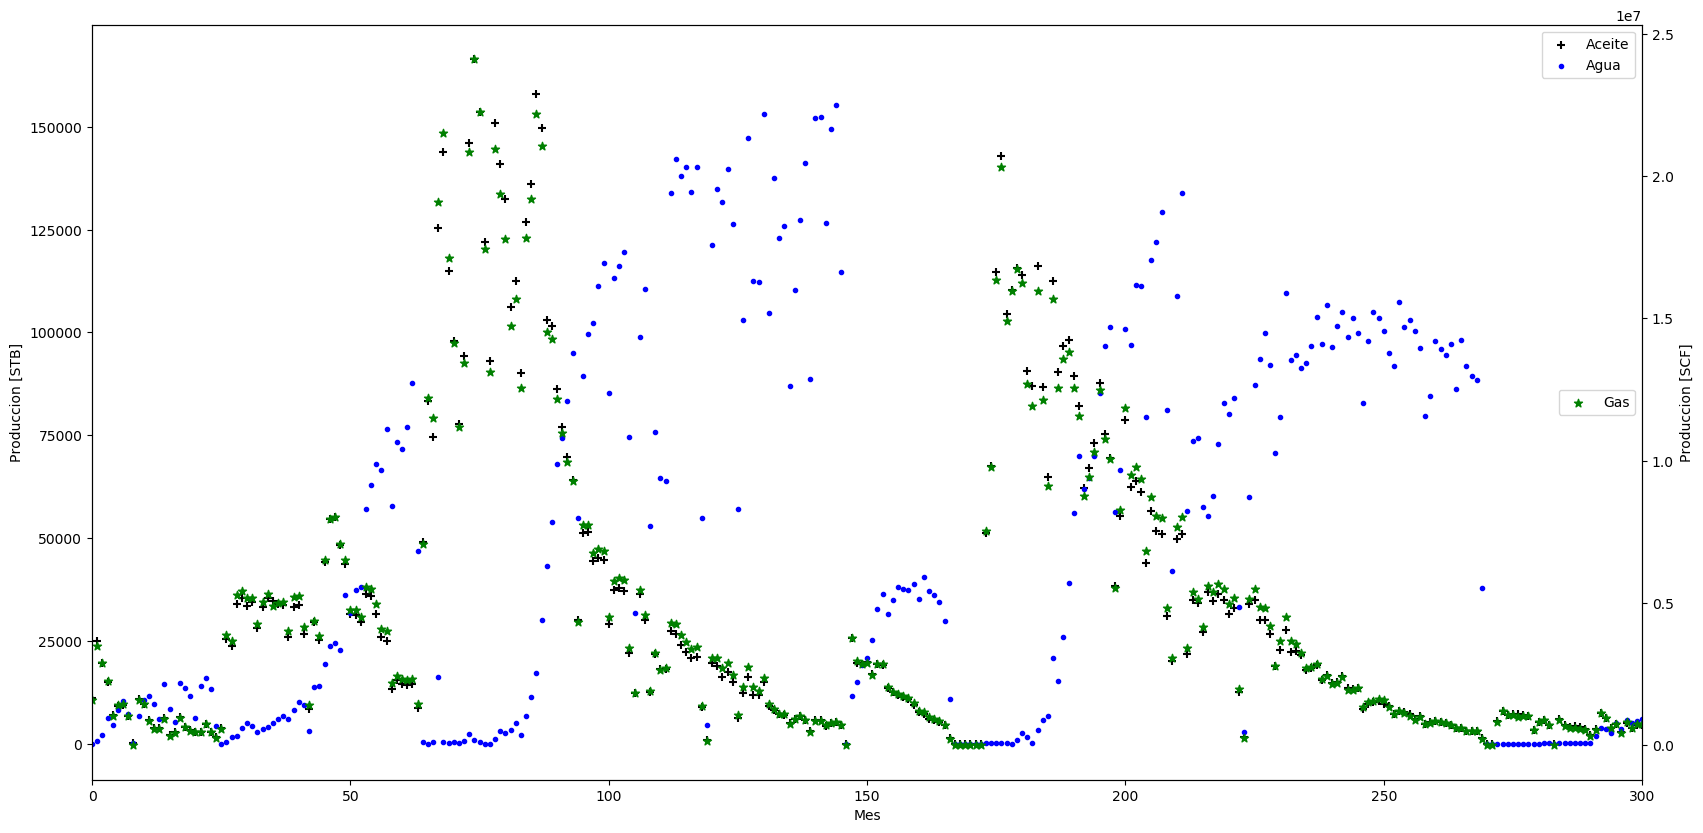

In [24]:
fig, ax1 = plt.subplots(figsize=(20,10),dpi=100)
ax2 = ax1.twinx()
ax1.scatter(PM["Mes Consecutivo"],PM["Oil"],label="Aceite",color = "black",marker ="+")
ax1.scatter(PM["Mes Consecutivo"],PM["Water"],label="Agua",color  = "Blue", marker =".")
ax2.scatter(PM["Mes Consecutivo"],PM["Gas"],label = "Gas",color="green",marker = "*")
ax1.set_xlabel('Mes')
ax1.set_ylabel('Produccion [STB]')
ax2.set_ylabel('Produccion [SCF]')
ax1.set_xlim(0,300)
ax1.legend(loc = "upper right")
ax2.legend(loc = "center right")
plt.show()

## Analisis puntuales
- `NO 15/9-F-1 C` : P1
- `NO 15/9-F-11 H`: P2
- `NO 15/9-F-12 H`: P3
- `NO 15/9-F-14 H`: P4
- `NO 15/9-F-15 D`: P5
- `NO 15/9-F-4 AH`: P6  -> Reconversion pozo inyector / productor
- `NO 15/9-F-5 AH`: P7 -> Inyector 



In [25]:
P1 = pd.DataFrame
P1 = PD.loc[PD["WELL_BORE_CODE"] == "NO 15/9-F-1 C"]
P2 = pd.DataFrame
P2 = PD.loc[PD["WELL_BORE_CODE"] == "NO 15/9-F-11 H"]
P3 = pd.DataFrame
P3 = PD.loc[PD["WELL_BORE_CODE"] == "NO 15/9-F-12 H"]
P4 = pd.DataFrame
P4 = PD.loc[PD["WELL_BORE_CODE"] == "NO 15/9-F-14 H"]
P5 = pd.DataFrame
P5 = PD.loc[PD["WELL_BORE_CODE"] == "NO 15/9-F-15 D"]
P6 = pd.DataFrame
P6 = PD.loc[PD["WELL_BORE_CODE"] == "NO 15/9-F-4 AH"]
P7 = pd.DataFrame
P7 = PD.loc[PD["WELL_BORE_CODE"] == "NO 15/9-F-5 AH"]

<function matplotlib.pyplot.show(*args, **kw)>

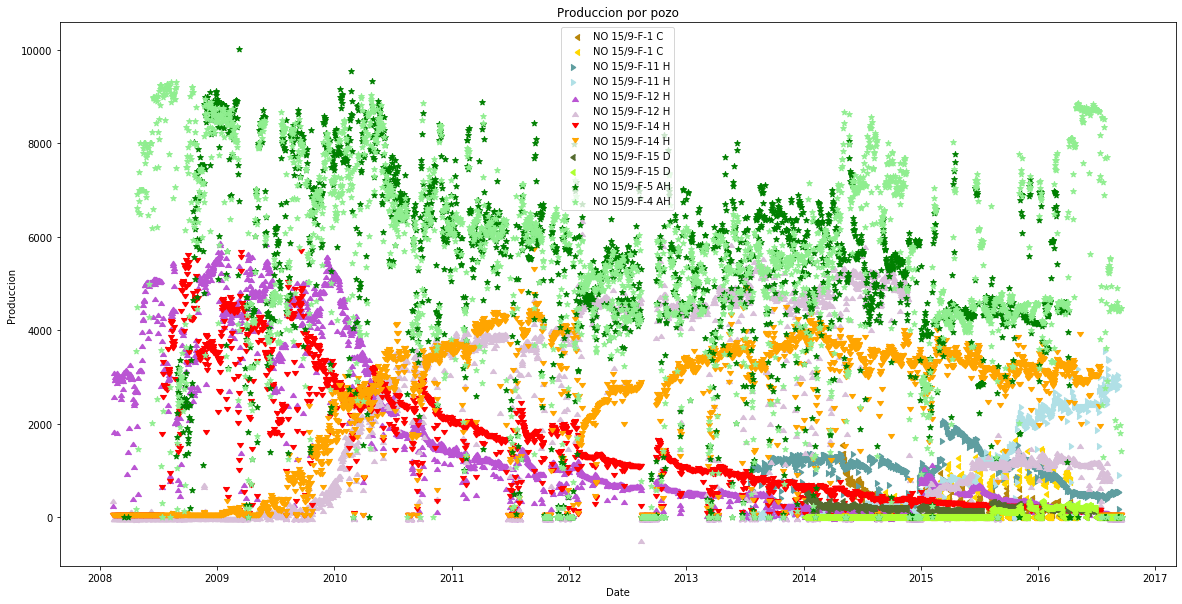

In [26]:
fig = plt.figure(figsize=(20,10))
plt.scatter(P1["DATEPRD"],P1["BORE_OIL_VOL"],color = "darkgoldenrod",label="NO 15/9-F-1 C" , marker = 4)
plt.scatter(P1["DATEPRD"],P1["BORE_WAT_VOL"],color = "gold",label="NO 15/9-F-1 C" , marker = 4)
plt.scatter(P2["DATEPRD"],P2["BORE_OIL_VOL"],color = "cadetblue",label="NO 15/9-F-11 H" , marker = 5)
plt.scatter(P2["DATEPRD"],P2["BORE_WAT_VOL"],color = "powderblue",label="NO 15/9-F-11 H" , marker = 5)

plt.scatter(P3["DATEPRD"],P3["BORE_OIL_VOL"],color = "mediumorchid",label="NO 15/9-F-12 H" , marker = 6)
plt.scatter(P3["DATEPRD"],P3["BORE_WAT_VOL"],color = "thistle",label="NO 15/9-F-12 H" , marker = 6)
plt.scatter(P4["DATEPRD"],P4["BORE_OIL_VOL"],color = "red",label="NO 15/9-F-14 H" , marker = 7)
plt.scatter(P4["DATEPRD"],P4["BORE_WAT_VOL"],color = "orange",label="NO 15/9-F-14 H" , marker = 7)

plt.scatter(P5["DATEPRD"],P5["BORE_OIL_VOL"],color = "darkolivegreen",label="NO 15/9-F-15 D" , marker = 8)
plt.scatter(P5["DATEPRD"],P5["BORE_WAT_VOL"],color = "greenyellow",label="NO 15/9-F-15 D" , marker = 8)
plt.scatter(P7["DATEPRD"],P7["BORE_WI_VOL"],label = "NO 15/9-F-5 AH",color="green",marker = "*")
plt.scatter(P6["DATEPRD"],P6["BORE_WI_VOL"],label = "NO 15/9-F-4 AH",color="lightgreen",marker = "*")
plt.xlabel("Date")
plt.ylabel("Produccion")
plt.title("Produccion por pozo")
plt.legend()
plt.show

In [27]:
P6.describe()

NPD_WELL_BORE_CODE  NPD_FIELD_CODE  NPD_FACILITY_CODE  ON_STREAM_HRS  \
count              3327.0          3327.0             3327.0    3175.000000   
mean               5693.0       3420717.0           369304.0      20.241626   
std                   0.0             0.0                0.0       7.966631   
min                5693.0       3420717.0           369304.0       0.000000   
25%                5693.0       3420717.0           369304.0      23.583330   
50%                5693.0       3420717.0           369304.0      24.000000   
75%                5693.0       3420717.0           369304.0      24.000000   
max                5693.0       3420717.0           369304.0      25.000000   

       AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
count                    0.0                       0.0            0.0   
mean                     NaN                       NaN            NaN   
std                      NaN                       NaN            NaN   
min                      NaN                       NaN            NaN   
25%                      NaN                       NaN            NaN   
50%                      NaN                       NaN            NaN   
75%                      NaN                       NaN            NaN   
max                      NaN                       NaN            NaN   

       AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  \
count                0.0               0.0        0.0        0.0   
mean                 NaN               NaN        NaN        NaN   
std                  NaN               NaN        NaN        NaN   
min                  NaN               NaN        NaN        NaN   
25%                  NaN               NaN        NaN        NaN   
50%                  NaN               NaN        NaN        NaN   
75%                  NaN               NaN        NaN        NaN   
max                  NaN               NaN        NaN        NaN   

       DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
count         3173.0           0.0           0.0           0.0  2990.000000  
mean             0.0           NaN           NaN           NaN  5431.681285  
std              0.0           NaN           NaN           NaN  2212.917195  
min              0.0           NaN           NaN           NaN     0.000000  
25%              0.0           NaN           NaN           NaN  4375.160518  
50%              0.0           NaN           NaN           NaN  5582.894859  
75%              0.0           NaN           NaN           NaN  7003.938377  
max              0.0           NaN           NaN           NaN  9316.000000

In [28]:
P7.describe()

NPD_WELL_BORE_CODE  NPD_FIELD_CODE  NPD_FACILITY_CODE  ON_STREAM_HRS  \
count              3306.0          3306.0             3306.0    3173.000000   
mean               5769.0       3420717.0           369304.0      19.171085   
std                   0.0             0.0                0.0       8.985641   
min                5769.0       3420717.0           369304.0       0.000000   
25%                5769.0       3420717.0           369304.0      20.833330   
50%                5769.0       3420717.0           369304.0      24.000000   
75%                5769.0       3420717.0           369304.0      24.000000   
max                5769.0       3420717.0           369304.0      25.000000   

       AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
count                    0.0                       0.0            0.0   
mean                     NaN                       NaN            NaN   
std                      NaN                       NaN            NaN   
min                      NaN                       NaN            NaN   
25%                      NaN                       NaN            NaN   
50%                      NaN                       NaN            NaN   
75%                      NaN                       NaN            NaN   
max                      NaN                       NaN            NaN   

       AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P   AVG_WHP_P   AVG_WHT_P  \
count         160.000000        160.000000  160.000000  151.000000   
mean           17.959953         68.844518   21.323219   43.189115   
std             7.571483         34.867559   10.113558   17.045277   
min             0.000000          0.558972    0.000000    0.228020   
25%            18.951508         78.733779   21.569630   45.296112   
50%            20.212604         79.519228   25.537631   48.359841   
75%            22.531673         94.997033   25.693196   52.704637   
max            29.454258        100.000000   83.865240   58.343028   

       DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL   BORE_WI_VOL  
count    3172.000000    160.000000    160.000000    160.000000   2716.000000  
mean        0.066034    257.254250  41011.410875     84.582375   5187.557618  
std         1.770995    131.091304  20887.080959     59.450453   2139.471689  
min         0.000000      0.000000      0.000000      0.000000      0.000000  
25%         0.000000    298.192500  47710.990000     77.257500   4311.700321  
50%         0.000000    307.885000  49502.490000     80.665000   5436.654636  
75%         0.000000    331.625000  53113.690000     97.932500   6529.042500  
max        83.865240    396.800000  62250.560000    334.070000  10013.600000

## Conjuncion de produccion
- Forma`array`
```
p3p = P3["BORE_OIL_VOL"].to_numpy()
p4p = P4["BORE_OIL_VOL"].to_numpy()
ptp = []
for i in range(len(p3p)):
    ptp_v = p3p[i] + p4p[i]
    ptp.append(ptp_v)
    i+=1
plt.plot(P3["DATEPRD"],ptp)
```


In [29]:
print("Producciones acumuladas\n\tPD:",PD["BORE_OIL_VOL"].sum())
print("\tPM:",PM["Oil"].sum())

Producciones acumuladas
	PD: 10037080.610000001
	PM: 10037080.61


In [103]:
PT = pd.DataFrame()
PT = PD.sort_values(by='DATEPRD')

In [109]:
PT['DATEPRD'] = pd.to_datetime(PT['DATEPRD'])
PT = pd.DataFrame(PT, columns = ["DATEPRD","BORE_OIL_VOL"])
PT

DATEPRD  BORE_OIL_VOL
12328 2007-09-01           NaN
9001  2007-09-01           NaN
12329 2007-09-02           NaN
9002  2007-09-02           NaN
9003  2007-09-03           NaN
...          ...           ...
12323 2016-10-05           NaN
12324 2016-10-06           NaN
12325 2016-10-07           NaN
12326 2016-11-01           NaN
12327 2016-12-01           NaN

[15634 rows x 2 columns]

In [137]:
produccion = PT.groupby(["DATEPRD"]).sum()
produccion = produccion["BORE_OIL_VOL"]

In [111]:
fecha = list(PT["DATEPRD"].unique())

In [112]:
len(fecha) == len(produccion)

True

In [113]:
produccion.sum() == PD["BORE_OIL_VOL"].sum()

False

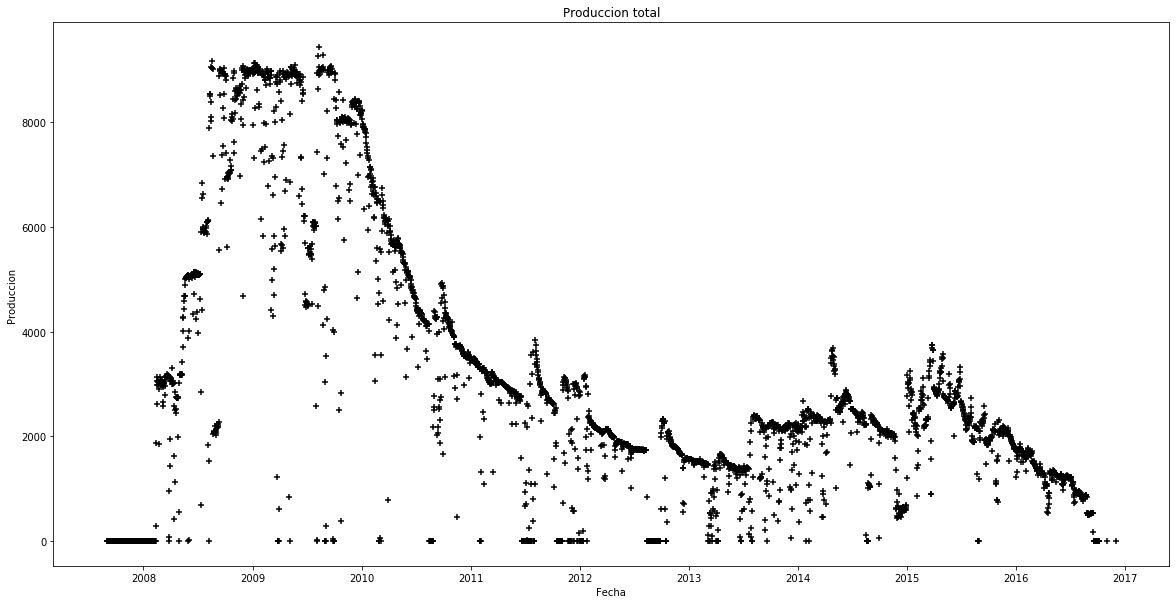

In [114]:
fig = plt.figure(figsize=(20,10))
plt.scatter(fecha,produccion,marker = "+", color="Black")
plt.xlabel("Fecha")
plt.ylabel("Produccion")
plt.title("Produccion total")
plt.show()

## Construccion DataFrame

In [141]:
fecha = np.array(fecha)
produccion = np.array(produccion)

In [142]:
consecutivo =np.arange(len(produccion))
PDF = pd.DataFrame()
PDF["Consecutivo"] = consecutivo
PDF["Fecha"] = fecha
PDF["Produccion"] = produccion

In [143]:
PDF["Produccion"].sum()

10037080.61

In [144]:
PDF.head()

Consecutivo      Fecha  Produccion
0            0 2007-09-01         0.0
1            1 2007-09-02         0.0
2            2 2007-09-03         0.0
3            3 2007-09-04         0.0
4            4 2007-09-05         0.0

### Calculo del diferencial de produccion
$$ \Delta{Q_o} = Q_{o_{i}} - Q_{o_{i-1}}$$

In [145]:
PDF['dQo'] = PDF["Produccion"] - PDF["Produccion"].shift(1)

### Calculo del gasto de declinacion
$$ D_i = \frac {\Delta{Q_o}}{Q_o} $$

In [146]:
PDF["Di"] = PDF["dQo"] / PDF["Produccion"] 

### Obtencion del logaritmo
$$ \log{Q_o} $$

In [147]:
PDF['Log(Qo)'] = np.log(PDF['Produccion'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [148]:
PDF

Consecutivo      Fecha  Produccion  dQo  Di  Log(Qo)
0               0 2007-09-01         0.0  NaN NaN     -inf
1               1 2007-09-02         0.0  0.0 NaN     -inf
2               2 2007-09-03         0.0  0.0 NaN     -inf
3               3 2007-09-04         0.0  0.0 NaN     -inf
4               4 2007-09-05         0.0  0.0 NaN     -inf
...           ...        ...         ...  ...  ..      ...
3322         3322 2016-10-05         0.0  0.0 NaN     -inf
3323         3323 2016-10-06         0.0  0.0 NaN     -inf
3324         3324 2016-10-07         0.0  0.0 NaN     -inf
3325         3325 2016-11-01         0.0  0.0 NaN     -inf
3326         3326 2016-12-01         0.0  0.0 NaN     -inf

[3327 rows x 6 columns]

### Limpieza de resultados

In [149]:
PDF["Log(Qo)"] = PDF["Log(Qo)"].replace([np.inf, -np.inf], np.nan)
PDF = PDF.dropna(subset=['Log(Qo)'])

In [150]:
PDF.head()

Consecutivo      Fecha  Produccion      dQo        Di   Log(Qo)
164          164 2008-02-12      284.65   284.65  1.000000  5.651260
165          165 2008-02-13     1869.70  1585.05  0.847756  7.533533
166          166 2008-02-14     3124.09  1254.39  0.401522  8.046898
167          167 2008-02-15     2608.28  -515.81 -0.197759  7.866446
168          168 2008-02-16     3051.80   443.52  0.145331  8.023487

In [151]:
PDF["Produccion"].sum()

10037080.61

## Graficacion

<Figure size 1500x700 with 0 Axes>

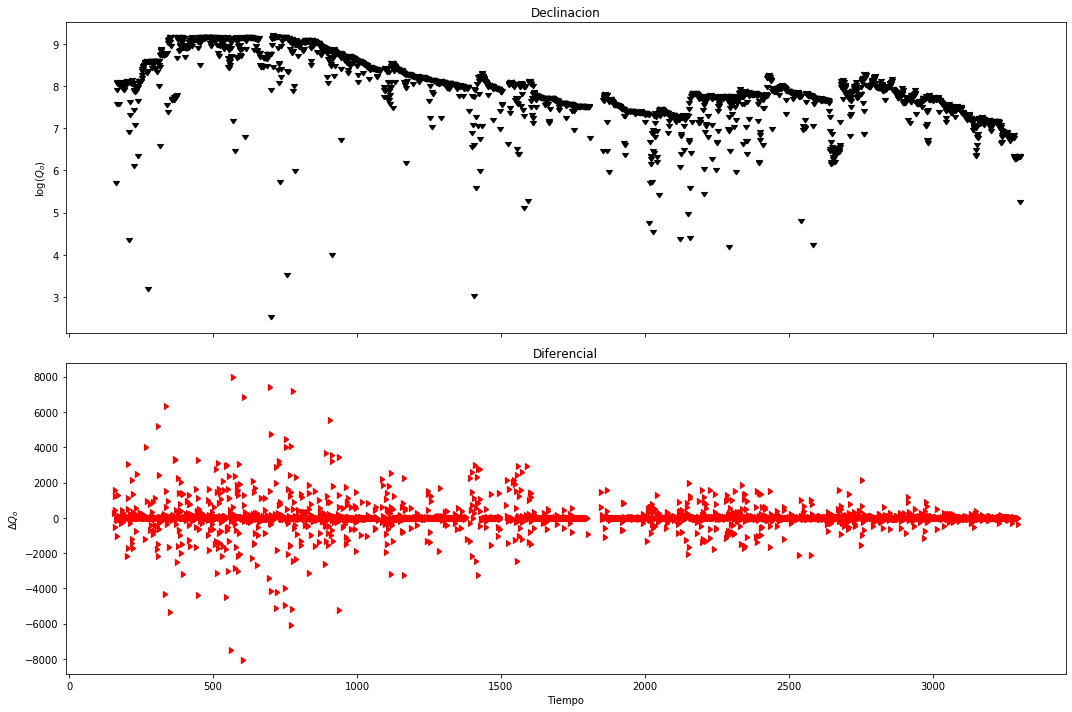

In [152]:
fig=plt.figure(figsize=(15,7),dpi=100)
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(15,10))

axes[0].scatter(PDF["Consecutivo"],PDF["Log(Qo)"],marker=7,color="black")
axes[0].set_ylabel('$\log({Q_o})$')
axes[0].set_title("Declinacion")

axes[1].scatter(PDF["Consecutivo"],PDF['dQo'],marker=5,color="red")
axes[1].set_ylabel('$\Delta{Q_o}$')
axes[1].set_title("Diferencial")
axes[1].set_xlabel("Tiempo")

plt.tight_layout()
plt.show()

### Analisis estadistico
$$ \Delta{Q_o} \approx media $$

In [153]:
PDF["dQo"].describe()

count    2962.000000
mean       24.097559
std       783.584609
min     -8042.520000
25%       -27.032500
50%        -2.160000
75%        29.795000
max      7961.170000
Name: dQo, dtype: float64

In [155]:
PDE = pd.DataFrame()
PDE = PDF.loc[PDF["dQo"] > -27.032500] 
PDE = PDE.loc[PDF["dQo"] < 29.795000]
PDE["dQo"].describe()

count    1480.000000
mean       -1.398959
std        12.991041
min       -26.980000
25%       -10.222500
50%        -2.160000
75%         6.947500
max        29.630000
Name: dQo, dtype: float64

<Figure size 1500x700 with 0 Axes>

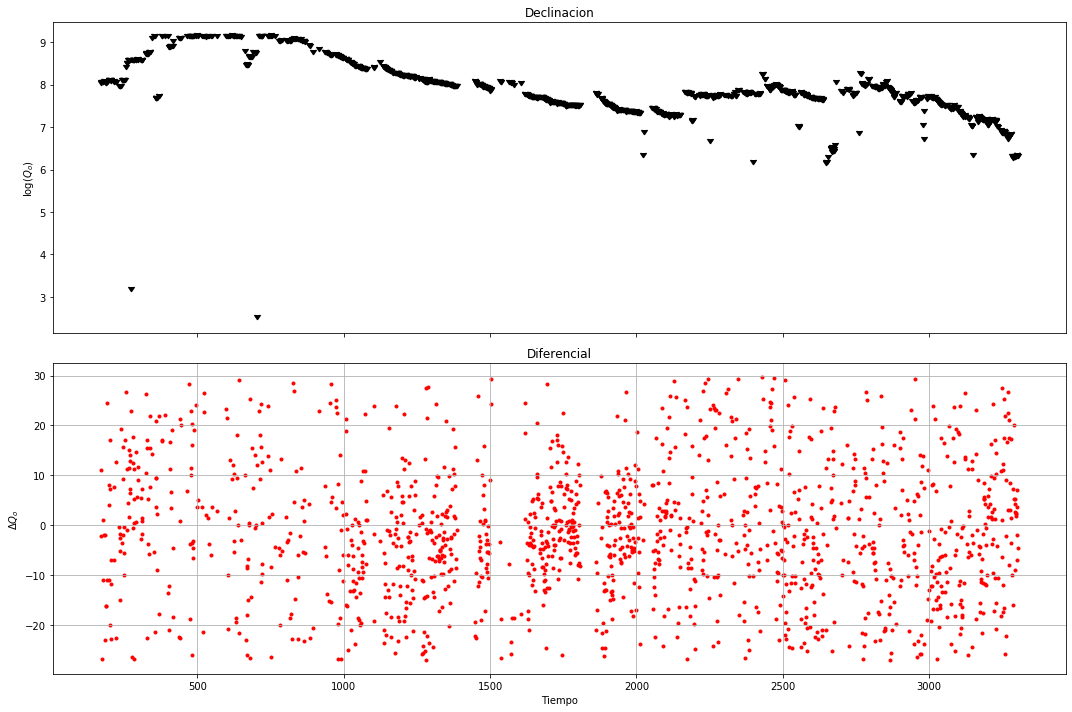

In [156]:
fig=plt.figure(figsize=(15,7),dpi=100)
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(15,10))

axes[0].scatter(PDE["Consecutivo"],PDE["Log(Qo)"],marker=7,color="black")
axes[0].set_ylabel('$\log({Q_o})$')
axes[0].set_title("Declinacion")

axes[1].scatter(PDE["Consecutivo"],PDE['dQo'],marker=".",color="red")
axes[1].set_ylabel('$\Delta{Q_o}$')
axes[1].set_title("Diferencial")
axes[1].set_xlabel("Tiempo")
axes[1].grid()

plt.tight_layout()
plt.show()

In [157]:
print("\nTasa de declinacion:\n")
D = np.abs(sum(PDE["Di"])/(len(PDE["Consecutivo"])))
print("\tD =", round(D,6) ,"/mes" )


Tasa de declinacion:

	D = 0.000895 /mes


## Modelos de regresion lineal
### DataFrame


In [206]:
ML = PDE[["Consecutivo","Log(Qo)"]]
ML = ML.rename(columns={'Consecutivo':'x','Log(Qo)':'y'})
sc = []

In [207]:
ML

x         y
170    170  7.999853
172    172  8.025248
173    173  8.016427
178    178  8.021762
179    179  8.018145
...    ...       ...
3299  3299  6.285570
3300  3300  6.298600
3301  3301  6.295045
3302  3302  6.282024
3303  3303  6.273386

[1480 rows x 2 columns]

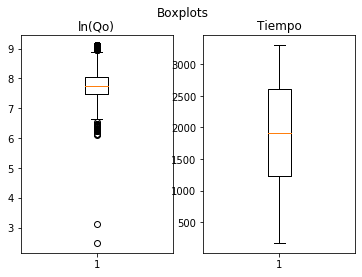

In [160]:
fig, axs = plt.subplots(1,2)
fig.suptitle('Boxplots')
axs[0].boxplot(ML["y"])
axs[0].set_title("ln(Qo)")
axs[1].boxplot(ML["x"])
axs[1].set_title("Tiempo")
plt.show() 

## `statsmodel`
### Librerias

In [164]:
import statsmodels.formula.api as smf

In [165]:
%%time
lm1 = smf.ols(formula="y~x", data = ML).fit()
lm1.params

Wall time: 52 ms


Intercept    8.722283
x           -0.000487
dtype: float64

In [166]:
print("Modelo lineal:")
print("y = -0.000211 x + 3.788039\n")
print("Factor de correlacion:")
print("R^2 =",lm1.rsquared)

Modelo lineal:
y = -0.000211 x + 3.788039

Factor de correlacion:
R^2 = 0.4843935130102208


In [208]:
sc.append(lm1.rsquared)

## `Scikit-Learn`
### Librerias

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Construccion del modelo

In [169]:
X = ML.iloc[:, :-1].values
y = ML.iloc[:, 1].values
print("X:",X.shape)
print("y:",y.shape)

X: (1480, 1)
y: (1480,)


In [170]:
%%time
lm2 = LinearRegression()
lm2.fit(X,y)

Wall time: 29.1 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
print("Modelo lineal:")
print("y =",lm2.coef_,"x +",lm2.intercept_)
print("\nFactor de correlacion:")
print("R^2 =",lm2.score(X,y))

Modelo lineal:
y = [-0.00048696] x + 8.722282638293752

Factor de correlacion:
R^2 = 0.4843935130102208


## Testing y Training sets
- Se procedera a dos modelos diferentes de sampleo
> `test_size = .80`<br>
> `test_size = .20`



### Librerias

In [173]:
from sklearn.model_selection import train_test_split

### Construccion del primer modelo

In [174]:
print("X:",X.shape)
print("y:",y.shape)

X: (1480, 1)
y: (1480,)


In [175]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=.90, random_state=0)

In [176]:
%%time
lm22 = LinearRegression()
lm22.fit(X_train1, y_train1)

Wall time: 8 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
print("Modelo lineal:")
print("y =",lm22.coef_,"x +",lm22.intercept_)
print("\nFactor de correlacion:")
print("R^2 =",lm22.score(X,y))

Modelo lineal:
y = [-0.0004353] x + 8.60285472271172

Factor de correlacion:
R^2 = 0.47763141749253807


In [178]:
sc.append(lm22.score(X,y))

### Construccion del segundo modelo

In [179]:
print("X:",X.shape)
print("y:",y.shape)

X: (1480, 1)
y: (1480,)


In [180]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=.10, random_state=0)

In [181]:
%%time
lm23 = LinearRegression()
lm23.fit(X_train2, y_train2)

Wall time: 22 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
print("Modelo lineal:")
print("y =",lm23.coef_,"x +",lm23.intercept_)
print("\nFactor de correlacion:")
print("R^2 =",lm23.score(X,y))

Modelo lineal:
y = [-0.00049184] x + 8.732027679007057

Factor de correlacion:
R^2 = 0.48434405243704565


In [183]:
sc.append(lm23.score(X,y))

### Testing y Training Datasets

<Figure size 1500x700 with 0 Axes>

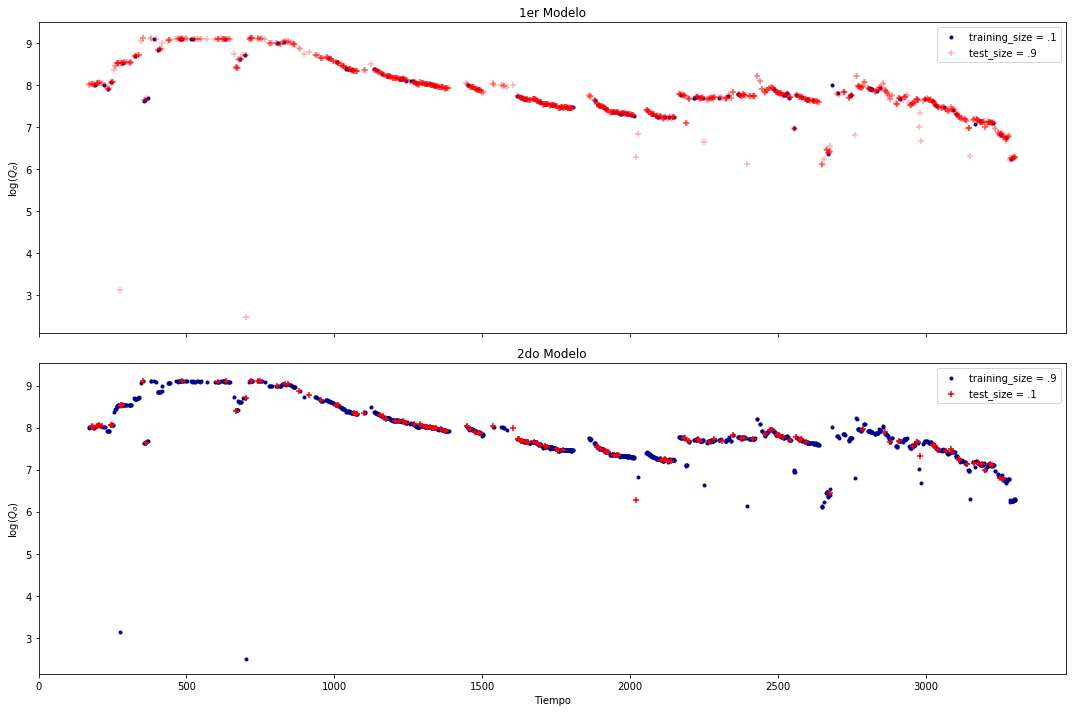

In [184]:
fig=plt.figure(figsize=(15,7),dpi=100)
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(15,10))

axes[0].scatter(X_train1,y_train1,label="training_size = .1", color="darkblue", marker = ".")
axes[0].scatter(X_test1,y_test1,label="test_size = .9", color="red", marker="+",alpha=.3)
axes[0].set_ylabel('$\log({Q_o})$')
axes[0].set_title("1er Modelo")
axes[0].legend()


axes[1].scatter(X_train2,y_train2, label = "training_size = .9", color="darkblue", marker = ".")
axes[1].scatter(X_test2,y_test2, label = "test_size = .1", color="red", marker="+")
axes[1].set_ylabel('$\log({Q_o})$')
axes[1].set_title("2do Modelo")
axes[1].set_xlabel("Tiempo")

plt.legend()
plt.tight_layout()
plt.show()

## Construccion Final

In [212]:
ML["StatsModels"]  = -0.00048696 *ML["x"] + 8.722282638293752
ML["Scikit-Learn"] = -0.00048696 *ML["x"] + 8.722282638293752
ML["SL,ts=.9"]     = -0.00043535 *ML["x"] + 8.60285472271172
ML["SL,ts=.1"]     = -0.00049184 *ML["x"] + 8.732027679007057

In [213]:
ML.head(5)

x         y  StatsModels  Scikit-Learn  SL,ts=.9  SL,ts=.1
170  170  7.999853     8.639499      8.639499  8.528845  8.648415
172  172  8.025248     8.638526      8.638526  8.527975  8.647431
173  173  8.016427     8.638039      8.638039  8.527539  8.646939
178  178  8.021762     8.635604      8.635604  8.525362  8.644480
179  179  8.018145     8.635117      8.635117  8.524927  8.643988

## Factor de correlacion
|StatsModels|Scikit-Learn|SL,ts=.9|SL,ts=.1|
| --- | --- | --- | ---|
|0.4843935130102207|0.4843935130102208|0.4776314174925378|0.4843440524370456

In [187]:
print("Aproximacion a utilizar:",max(sc))

Aproximacion a utilizar: 0.4843935130102208


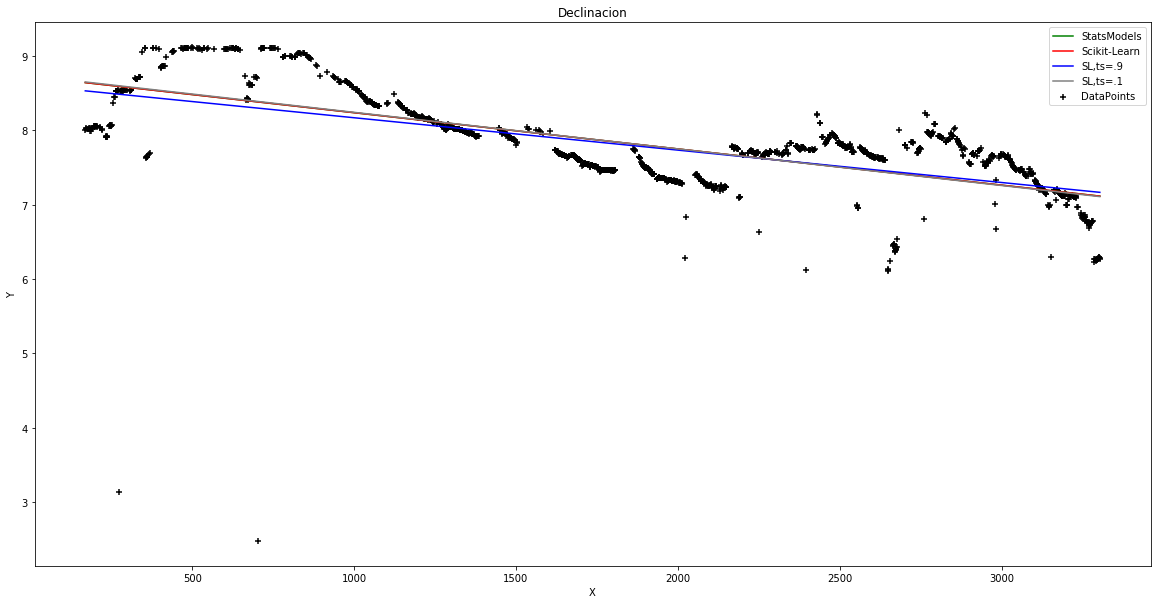

In [214]:
fig = plt.figure(figsize=(20,10))

plt.scatter(ML["x"],ML["y"],marker = "+" , label = "DataPoints",color="black")

plt.plot(ML["x"],ML["StatsModels"], label = "StatsModels", color="green")
plt.plot(ML["x"],ML["Scikit-Learn"], label = "Scikit-Learn", color="red")
plt.plot(ML["x"],ML["SL,ts=.9"], label = "SL,ts=.9", color="Blue")
plt.plot(ML["x"],ML["SL,ts=.1"], label = "SL,ts=.1", color="Grey")

plt.xlabel("X") ; #plt.ylim(2.5,4)
plt.ylabel("Y")
plt.title("Declinacion")
plt.legend()
plt.show()

## Determinacion de tiempo de abandono
$$ Q_o = 85,000[bpd]  $$
### Modelo lineal
$$ \log(Q_o) = 3.7880392194115124 -0.00021148 (T)  $$
<br>
$$ T = \frac{3.7880392194115124-\log(Q_o)}{-0.00021148} $$

In [215]:
PD["BORE_OIL_VOL"].describe()

count    9161.000000
mean     1095.631548
std      1323.538151
min         0.000000
25%       190.690000
50%       557.550000
75%      1345.200000
max      5901.840000
Name: BORE_OIL_VOL, dtype: float64

In [218]:
y = 1095.631548
x = ( 8.722282638293752-np.log(y))/(-0.00048696)
print("Dias para el abandono:" ,x)
print("Meses para el abandono:" ,x/31)
print("Años para el abandono:",x/(12*31))

Dias para el abandono: -3538.6816291660075
Meses para el abandono: -114.15102029567767
Años para el abandono: -9.512585024639804


# Suprimiendo outliers

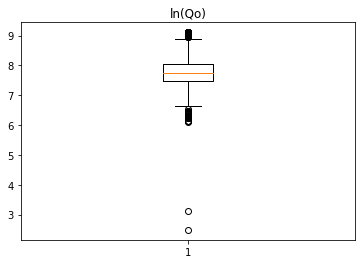

In [219]:
plt.boxplot(ML["y"])
plt.title("ln(Qo)")
plt.show()

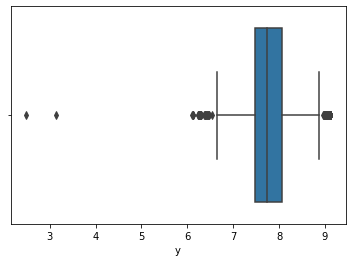

In [220]:
sns.boxplot(x=ML["y"])

## Librerias

In [221]:
from scipy import stats

## Procedimiento

In [231]:
ML['z_score'] = stats.zscore(ML["y"])
ML_m = pd.DataFrame()
ML_m = ML.loc[ML['z_score'].abs()<=3]

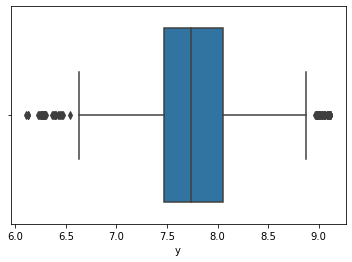

In [234]:
sns.boxplot(x=ML_m["y"])

In [233]:
ML_m["y"].describe()

count    1478.000000
mean        7.811367
std         0.581880
min         6.106377
25%         7.467185
50%         7.732928
75%         8.056193
max         9.113891
Name: y, dtype: float64

In [235]:
IQR = 8.056193 - 7.467185
IQR

0.5890080000000006

In [237]:
minQ = 7.467185 -1.5*(IQR)
maxQ = 8.056193 +1.5*(IQR)

In [238]:
ML_m1 = pd.DataFrame()
ML_m1 = ML_m.loc[ML_m["y"] > minQ]
ML_m1 = ML_m1.loc[ML_m["y"] < maxQ]

In [239]:
ML_m1

x         y  StatsModels  Scikit-Learn  SL,ts=.9  SL,ts=.1   z_score
170    170  7.999853     8.639499      8.639499  8.528845  8.648415  0.320197
172    172  8.025248     8.638526      8.638526  8.527975  8.647431  0.361843
173    173  8.016427     8.638039      8.638039  8.527539  8.646939  0.347377
178    178  8.021762     8.635604      8.635604  8.525362  8.644480  0.356126
179    179  8.018145     8.635117      8.635117  8.524927  8.643988  0.350194
...    ...       ...          ...           ...       ...       ...       ...
3275  3275  6.755618     7.127489      7.127489  7.177083  7.121252 -1.720292
3278  3278  6.763504     7.126028      7.126028  7.175777  7.119776 -1.707359
3279  3279  6.783189     7.125541      7.125541  7.175342  7.119284 -1.675076
3280  3280  6.779172     7.125054      7.125054  7.174907  7.118792 -1.681664
3281  3281  6.780717     7.124567      7.124567  7.174471  7.118301 -1.679130

[1333 rows x 7 columns]

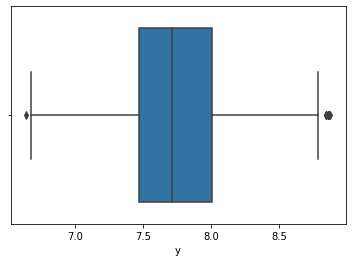

In [240]:
sns.boxplot(x=ML_m1["y"])

<Figure size 1500x700 with 0 Axes>

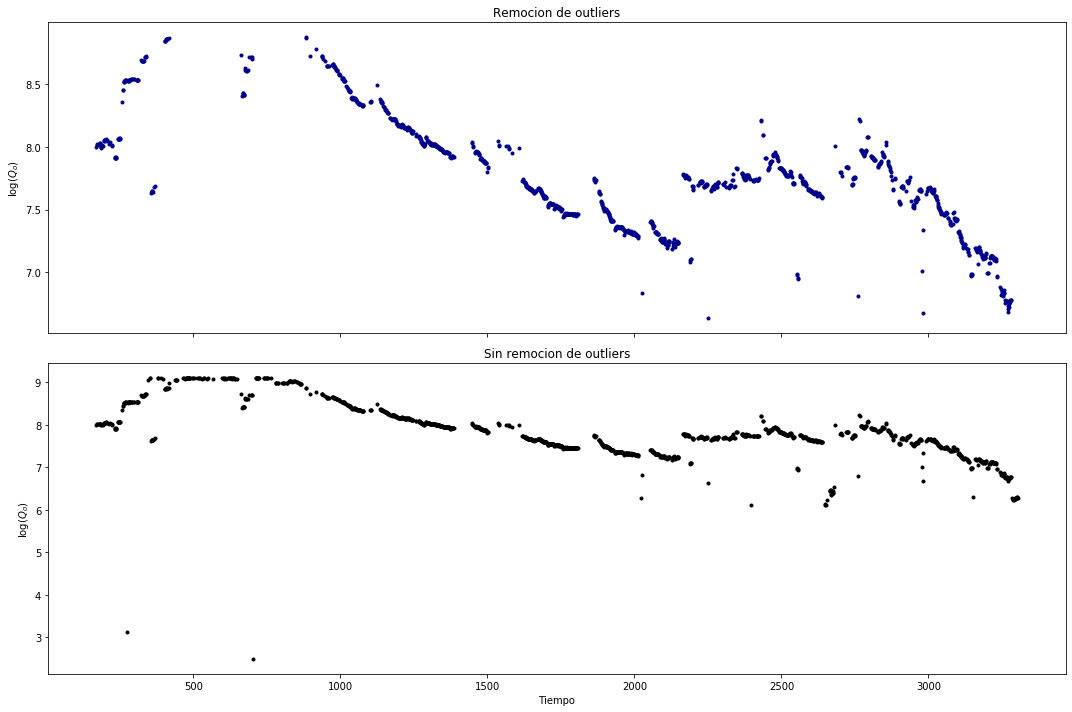

In [241]:
fig=plt.figure(figsize=(15,7),dpi=100)
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(15,10))

axes[0].scatter(ML_m1["x"],ML_m1["y"], color="darkblue", marker = ".")
axes[0].set_ylabel('$\log({Q_o})$')
axes[0].set_title("Remocion de outliers")

axes[1].scatter(ML["x"],ML["y"], color="black", marker = ".")
axes[1].set_ylabel('$\log({Q_o})$')
axes[1].set_title("Sin remocion de outliers")
axes[1].set_xlabel("Tiempo")

plt.tight_layout()
plt.show()

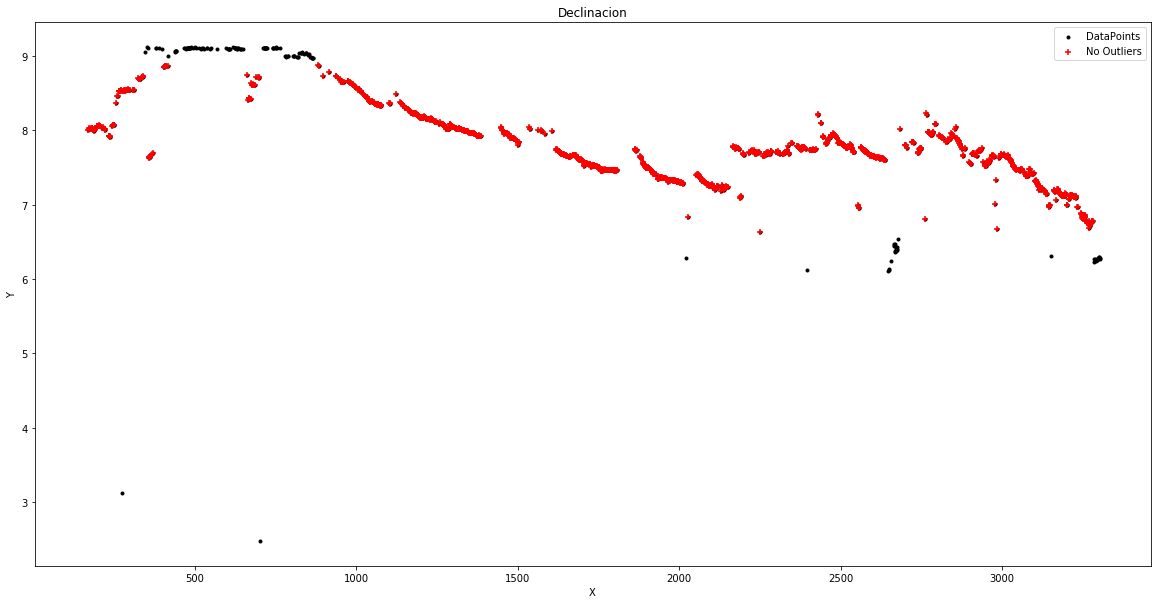

In [242]:
fig = plt.figure(figsize=(20,10))
plt.scatter(ML["x"],ML["y"],marker = "." , label = "DataPoints",color="black")
plt.scatter(ML_m1["x"],ML_m1["y"], label = "No Outliers", color="red", marker = "+")
plt.xlabel("X") 
plt.ylabel("Y")
plt.title("Declinacion")
plt.legend()

## Scikit-Learn
### Construccion del modelo

In [244]:
ML_m2 = pd.DataFrame(ML_m1 , columns=["x","y"])
X = ML_m2.iloc[:, :-1].values
y = ML_m2.iloc[:, 1].values
print("X:",X.shape)
print("y:",y.shape)

X: (1333, 1)
y: (1333,)


In [245]:
%%time
lmm = LinearRegression()
lmm.fit(X,y)

Wall time: 21 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [246]:
print("Modelo lineal:")
print("y =",lmm.coef_,"x +",lmm.intercept_)
print("\nFactor de correlacion:")
print("R^2 =",lmm.score(X,y))

Modelo lineal:
y = [-0.00036377] x + 8.463411090980143

Factor de correlacion:
R^2 = 0.49454557934670346


In [247]:
ML_m1["Scikit-Learn"] = -0.00036377 *ML_m1["x"] + 8.463411090980143

# Resultados finales

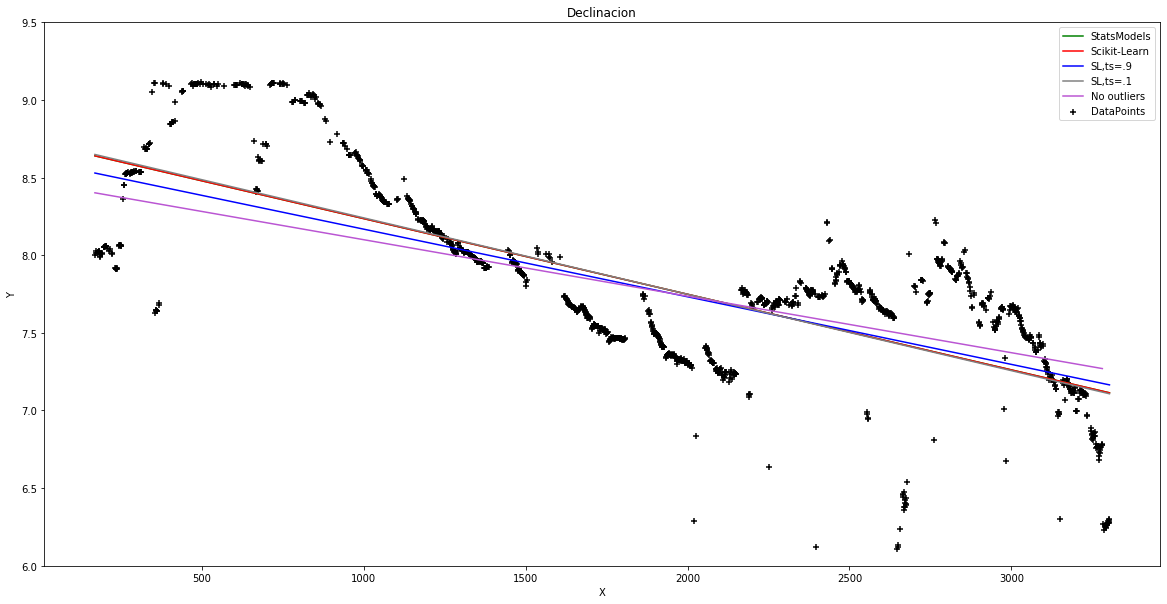

In [250]:
fig = plt.figure(figsize=(20,10))

plt.scatter(ML["x"],ML["y"],marker = "+" , label = "DataPoints",color="black")

plt.plot(ML["x"],ML["StatsModels"], label = "StatsModels", color="green")
plt.plot(ML["x"],ML["Scikit-Learn"], label = "Scikit-Learn", color="red")
plt.plot(ML["x"],ML["SL,ts=.9"], label = "SL,ts=.9", color="Blue")
plt.plot(ML["x"],ML["SL,ts=.1"], label = "SL,ts=.1", color="Grey")
plt.plot(ML_m1["x"],ML_m1["Scikit-Learn"], label = "No outliers", color="mediumorchid")

plt.xlabel("X") ; plt.ylim(6,9.5)
plt.ylabel("Y")
plt.title("Declinacion")
plt.legend()
plt.show()

## Determinacion de tiempo de abandono

In [252]:
y = 1095.631548
x = ( 8.463411090980143-np.log(y))/(-0.00036377 )
print("Dias para el abandono:" ,x)
print("Meses para el abandono:" ,x/31)
print("Años para el abandono:",x/(12*31))

Dias para el abandono: -4025.414022115815
Meses para el abandono: -129.85206522954243
Años para el abandono: -10.821005435795202


# Delimitacion de tiempo de analisis 
##  Creacion DataFrame

In [266]:
DF1 = pd.DataFrame(ML_m1, columns=["x","y"])
DF1 = DF1.reset_index(drop=True)

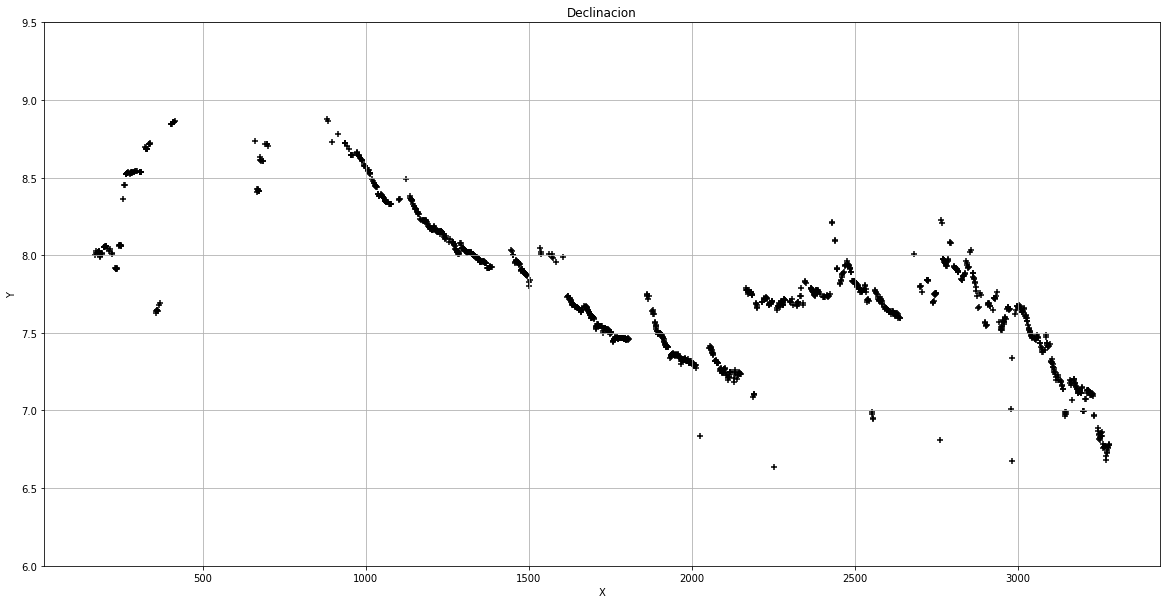

In [281]:
fig = plt.figure(figsize=(20,10))
plt.scatter(DF1["x"],DF1["y"],marker="+",color="black")
plt.xlabel("X") ; plt.ylim(6,9.5)
plt.ylabel("Y")
plt.title("Declinacion")
plt.grid()
plt.show()

## Metodo de las pendientes
$$ m = \frac{y_2-y_1}{x_2-x_1} $$

In [271]:
DF1["num"] = DF1["y"] - DF1["y"].shift(1)
DF1["den"] = DF1["x"] - DF1["x"].shift(1)
DF1["m"] = DF1["num"]/DF1["den"]
DF1

x         y       num  den         m
0      170  7.999853       NaN  NaN       NaN
1      172  8.025248  0.025395  2.0  0.012698
2      173  8.016427 -0.008821  1.0 -0.008821
3      178  8.021762  0.005335  5.0  0.001067
4      179  8.018145 -0.003617  1.0 -0.003617
...    ...       ...       ...  ...       ...
1328  3275  6.755618  0.009840  1.0  0.009840
1329  3278  6.763504  0.007886  3.0  0.002629
1330  3279  6.783189  0.019686  1.0  0.019686
1331  3280  6.779172 -0.004018  1.0 -0.004018
1332  3281  6.780717  0.001545  1.0  0.001545

[1333 rows x 5 columns]

In [272]:
DF1.describe()

x            y          num          den            m
count  1333.000000  1333.000000  1332.000000  1332.000000  1332.000000
mean   1958.206302     7.751072    -0.000915     2.335586    -0.001274
std     820.362582     0.424357     0.102486     9.092520     0.023099
min     170.000000     6.635618    -1.091554     1.000000    -0.330496
25%    1334.000000     7.467228    -0.006293     1.000000    -0.005222
50%    1966.000000     7.713329    -0.001756     1.000000    -0.001581
75%    2604.000000     8.001626     0.002893     1.000000     0.002535
max    3281.000000     8.873628     1.415161   246.000000     0.471720

In [304]:
DF1["dm"] = DF1["m"] - DF1["m"].shift(1) 

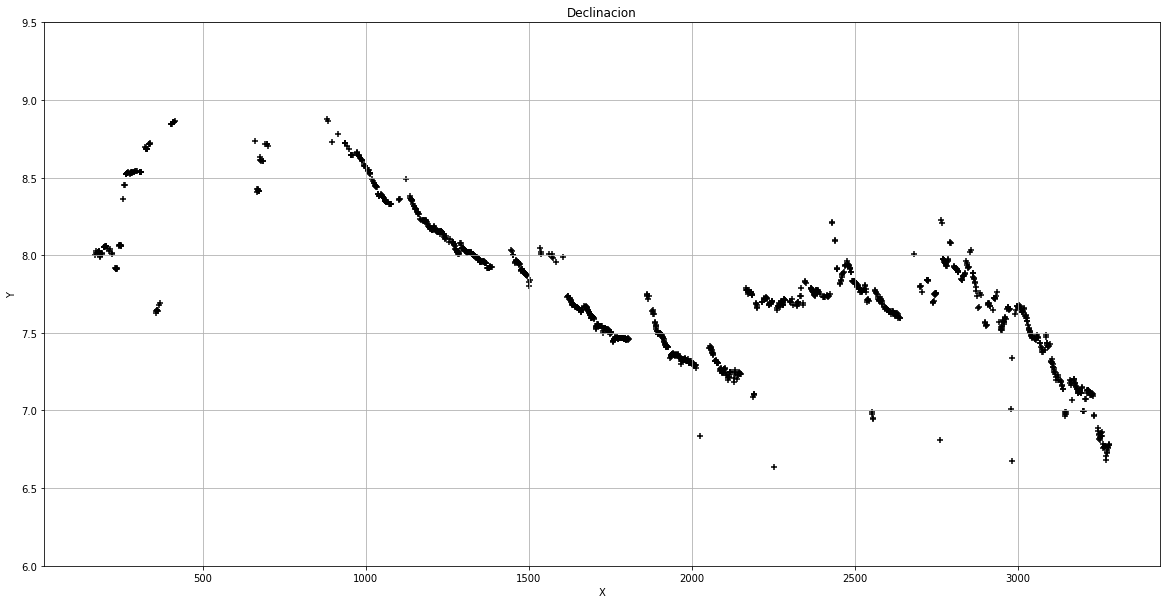

In [292]:
fig = plt.figure(figsize=(20,10))
plt.scatter(DF1["x"],DF1["y"],marker="+",color="black")
plt.scatter(M1["x"],M1["y"], marker ="*",color = "red")
plt.xlabel("X") ; plt.ylim(6,9.5)
plt.ylabel("Y")
plt.title("Declinacion")
plt.grid()
plt.show()

<Figure size 1500x700 with 0 Axes>

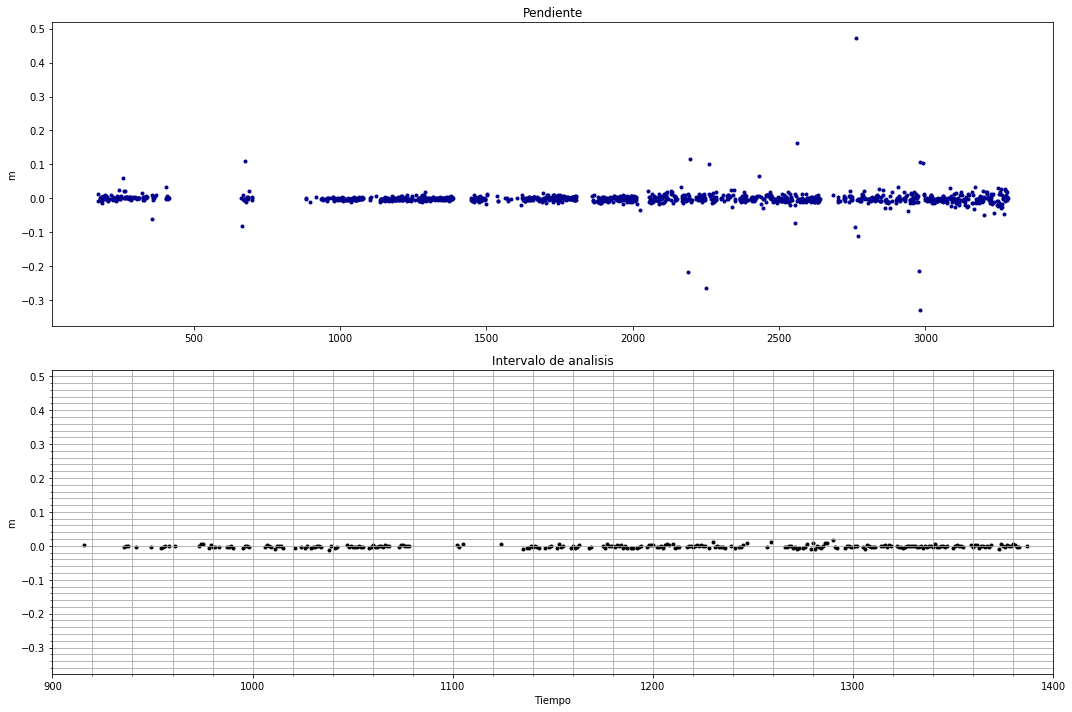

In [317]:
fig=plt.figure(figsize=(15,7),dpi=100)
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False,figsize=(15,10))

axes[0].scatter(DF1["x"],DF1["m"], color="darkblue", marker = ".")
axes[0].set_ylabel('m')
axes[0].set_title("Pendiente")


axes[1].scatter(DF1["x"],DF1["m"], color="black", marker = ".")
axes[1].set_ylabel('m')
axes[1].set_title("Intervalo de analisis")
axes[1].set_xlabel("Tiempo")
axes[1].set_xlim(900,1400)
axes[1].grid(b=True, which='both', color='0.65', linestyle='-')
axes[1].minorticks_on()


plt.tight_layout()
plt.show()

## Intervalo de analisis:
$$ Lim_{inf} = 850 $$
<br>
$$ Lim_{sup} = 1380 $$

In [354]:
Int = pd.DataFrame()
Int = DF1.loc[DF1["x"] > 850]
Int = Int.loc[DF1["x"] < 1380]

In [355]:
del Int["num"]
del Int["m"]
del Int["dm"]
del Int["den"]

## Construccion de modelo `Scikit-Learn`

In [356]:
X = Int.iloc[:, :-1].values
y = Int.iloc[:, 1].values
print("X:",X.shape)
print("y:",y.shape)
lmm1 = LinearRegression()
lmm1.fit(X,y)
print("\nModelo lineal:")
print("y =",lmm1.coef_,"x +",lmm1.intercept_)
print("\nFactor de correlacion:")
print("R^2 =",lmm1.score(X,y))

X: (257, 1)
y: (257,)

Modelo lineal:
y = [-0.00168309] x + 10.220627255564956

Factor de correlacion:
R^2 = 0.9645779125748841


In [357]:
Int["Scikit-Learn"] = -0.00168309 *Int["x"] + 10.220627255564956

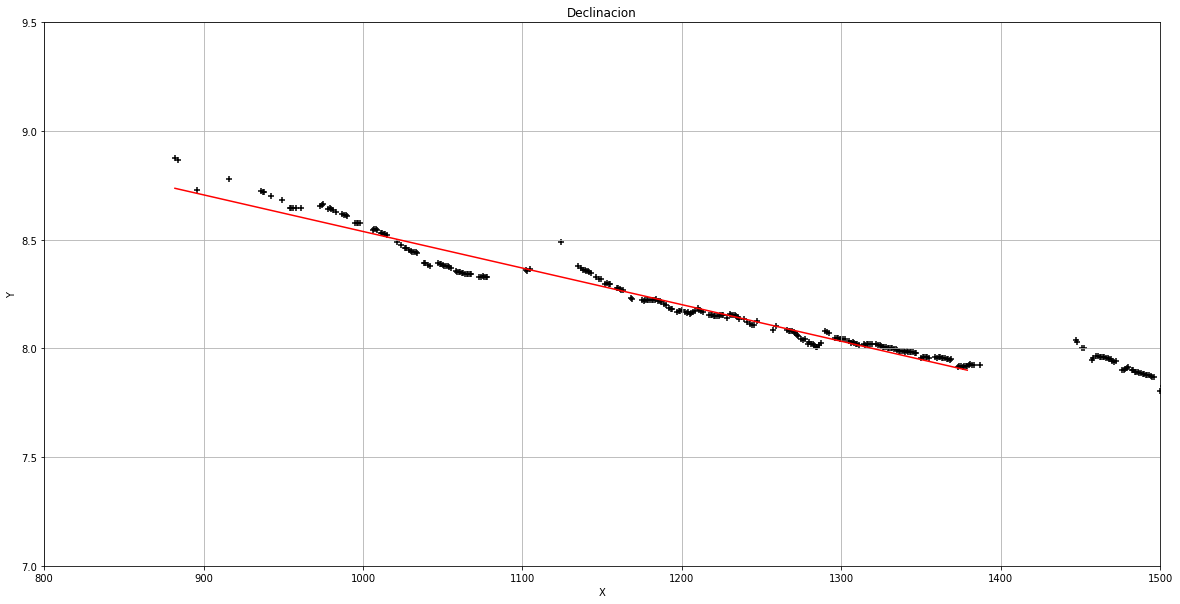

In [350]:
fig = plt.figure(figsize=(20,10))
plt.scatter(DF1["x"],DF1["y"],marker="+",color="black")
plt.plot(Int["x"],Int["Scikit-Learn"],color = "red")
plt.xlabel("X") ; plt.ylim(6,9.5)
plt.ylabel("Y")
plt.title("Declinacion")
plt.xlim(800,1500)
plt.ylim(7,9.5)
plt.grid()
plt.show()

## Determinacion de tiempo de abandono
$$ \log{Q_o} = \frac{mT_{abandono}}{b} + \log{Q_{oi}}$$
<br>
$$ T_{abandono} = \log{Q_{oi}} -\log{Q_o} * \frac{b}{m} $$

In [360]:
print("Modelo lineal:")
print("y =",lmm1.coef_,"x +",lmm1.intercept_)

Modelo lineal:
y = [-0.00168309] x + 10.220627255564956


In [363]:
Qo_i = max(produccion)
Qo = 1095.631548
x =(10.220627255564956/0.00168309) * (np.log(Qo_i)-np.log(Qo))
print("Dias para el abandono:" ,x)
print("Meses para el abandono:" ,x/31)
print("Años para el abandono:",x/(12*31))

Dias para el abandono: 13075.787782408444
Meses para el abandono: 421.7996058841434
Años para el abandono: 35.14996715701195
